# Visualizing Loans Awarded by Kiva

In this project we'll visualize insights using a dataset from <a href = "https://www.kaggle.com/fkosmowski/kivadhsv1" target = "_blank">Kaggle</a>. The dataset contains information about loans awarded by the non-profit <a href = "https://www.kiva.org/" target = "_blank">Kiva</a>. 

Using Seaborn, we'll explore the average loan amount by country using aggregated bar charts. We'll also visualize the distribution of loan amounts by project type and gender using box plots and violin plots.

## Step 1: Import Necessary Python Modules

In [11]:
import pandas as pd
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt
import seaborn as sns

## Step 2: Ingest The Data
Load **kiva_data.csv** into a DataFrame

In [12]:
kiva = pd.read_csv('kiva_data.csv')

## Step 3: Preview The Data

If you would like, you can examine the raw CSV file on your local machine. You can find **kiva_data.csv** in the project's folder.

### Overview of the dataset:

Each entry (row) in the dataset represents a loan that Kiva awarded to a particular project. The `loan_amount` column shows the amount (in U.S. dollars) awarded to the project. The `activity` column has the category type that the project falls under. The `country` column is the country where the project is located. The `gender` column represents the gender of the primary person who applied for the loan. 

In [13]:
kiva.head(100)

,loan_amount,activity,country,gender
0,625,Food Production/Sales,Pakistan,female
1,250,Food Production/Sales,Pakistan,female
2,400,Food Production/Sales,Pakistan,female
3,400,Food Production/Sales,Pakistan,female
4,500,Food Production/Sales,Pakistan,female
5,500,Food Production/Sales,Pakistan,female
6,400,Food Production/Sales,Pakistan,female
7,500,Food Production/Sales,Pakistan,female
8,400,Food Production/Sales,Pakistan,female
9,450,Food Production/Sales,Pakistan,female


## Step 4: Bar Charts

We'll create a bar plot using Seaborn to visualize the average size of Kiva loans given to projects, by country and gender.

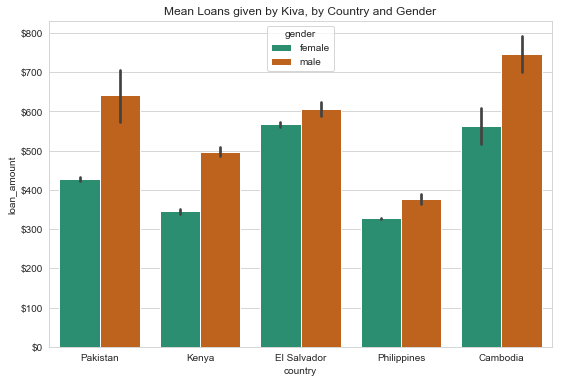

In [14]:
# Set color palette
sns.set_palette(sns.color_palette(['#1b9e77','#d95f02']))

# Set style
sns.set_style('whitegrid')

# Creates the figure
f, ax = plt.subplots(figsize=(9, 6))

# Add a title
ax.set_title('Mean Loans given by Kiva, by Country and Gender')

# Format y-axis ticks
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Plot the data
sns.barplot(data=kiva, x='country', y='loan_amount', hue='gender')

#### Analysis

Across the board, men have been awarded larger grants than women, though in El Salvador that difference is small.  Kiva should probably review their awarding procedures to eliminate any gender bias, whether it happens consciously or not. They should also consider other possible reasons for the disparity. For example, see if women consistently tend to apply for smaller loan amounts, and if found to be so, encourage them to apply for more.

## Step 7: Box Plots

### Distribution by Country

Now we will make a box plot to compare the distribution of loans by country.

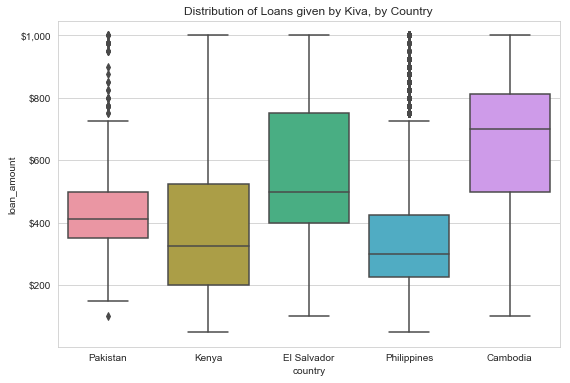

In [15]:
f, ax = plt.subplots(figsize=(9, 6))

# Add a title
ax.set_title('Distribution of Loans given by Kiva, by Country')

# Format y-axis ticks
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

sns.boxplot(data=kiva, x='country', y='loan_amount')

#### Analysis

From this chart it seems Kenya has the widest distribution in loan amounts given, followed closely by Cambodia and El Salvador.
We can also tell that Cambodians are more likely to recieve a larger grant.

### Distribution by Activity

Instead of visualizing the loan amount by country, we'll use sns.boxplot() to plot the loan amount by activity.

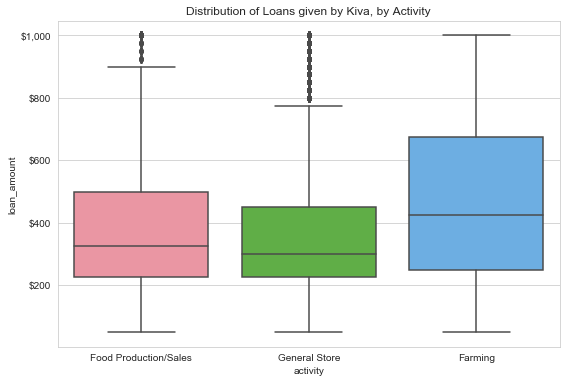

In [16]:
f, ax = plt.subplots(figsize=(9, 6))

# Add a title
ax.set_title('Distribution of Loans given by Kiva, by Activity')

# Format y-axis ticks
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

sns.boxplot(data=kiva, x='activity', y='loan_amount')

#### Analysis

We see that the loans given for farming tend to be significantly larger than those for other activities.  Perhaps this is the true explanatory variable infuencing loan amounts. For example, if farming projects necessitate greater loans, and Cambodia has a greater economic presence in farming relative to the other activities and countries, that would explain why they are awarded higher loans.  If men tend to be more interested in farming projects, and women tend to be more interested in food production, that might explain the disparity between loans awarded to each gender.

## Step 8: Violin Plots

### Distrubition by Activity

Now we'll combare the distributions by activity using violin plots.

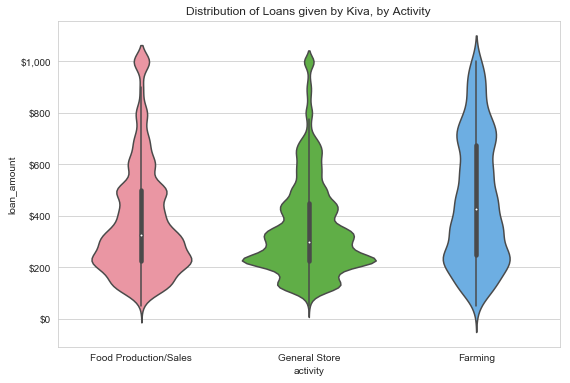

In [17]:
f, ax = plt.subplots(figsize=(9, 6))

# Add a title
ax.set_title('Distribution of Loans given by Kiva, by Activity')

# Format y-axis ticks
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

sns.violinplot(data=kiva, x='activity', y='loan_amount')

### Distribution by Country

Now we'll reverty to visualizing loan distribution by country, using a violin plot again.

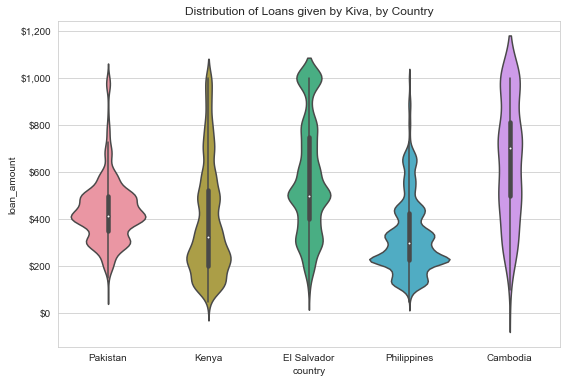

In [18]:
f, ax = plt.subplots(figsize=(9, 6))

# Add a title
ax.set_title('Distribution of Loans given by Kiva, by Country')

# Format y-axis ticks
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

sns.violinplot(data=kiva, x='country', y='loan_amount')

## Step 9: Split Violin Plots

### Distribution by Country and Gender

We'll use the `hue` parameter to visualize the distribution of loan amounts by country and gender.

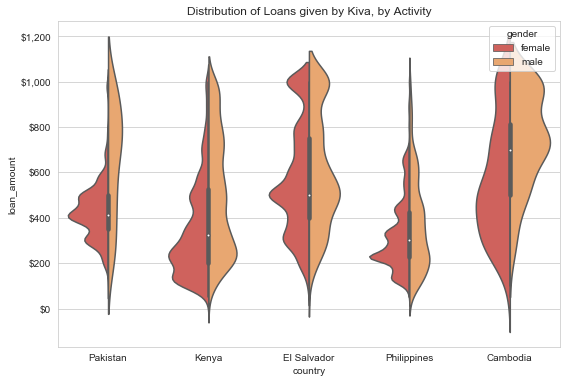

In [19]:
f, ax = plt.subplots(figsize=(9, 6))

# Change color palette
sns.set_palette("Spectral")

# Add a title
ax.set_title('Distribution of Loans given by Kiva, by Activity')

# Format y-axis ticks
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

sns.violinplot(data=kiva, x='country', y='loan_amount', hue='gender', split=True)

#### Analysis

We can see that while the range of loan amounts is similar between genders, men tend to recieve higher loan amounts.

### Distribution by Activity and Gender

Earlier we hypothesized that the disparity of loan amount between genders may have to do with their interest in specific activities.  Let's do a split violin plot to see if that is the case

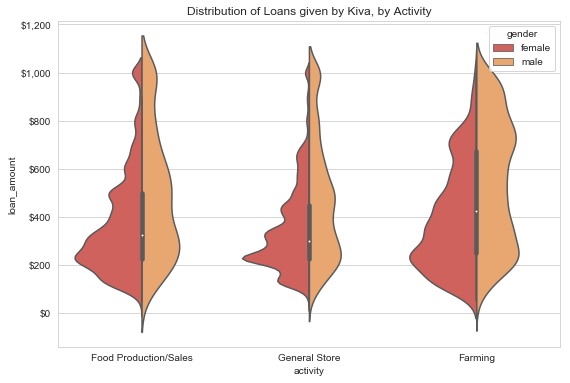

In [20]:
f, ax = plt.subplots(figsize=(9, 6))

# Change color palette
sns.set_palette("Spectral")

# Add a title
ax.set_title('Distribution of Loans given by Kiva, by Activity')

# Format y-axis ticks
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

sns.violinplot(data=kiva, x='activity', y='loan_amount', hue='gender', split=True)

#### Analysis

We see that while some of the variation in loan amounts is correlated with the activity (farming tending to recieve the largest), there is definitely disparity between loan amounts by gender within a given activity (women recieving significantly less).  We conclude that Kiva should continue to seek the source of this disparity and address it.